# Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

### 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. 
- Would you recommend rescaling the data based on these statistics?

In [2]:
#Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 
#Create a pandas dataframe, df_iris, from this data
df_iris = data('iris') #using pydataset
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
#create a pandas dataframe using seaborn
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#print the first 3 rows
df_iris.head(3) 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [6]:
#print the column names
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#turn above into a list
list(df_iris.columns)

#or df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
#print the data type of each column
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
#dtypes w/ more info
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#print the summary statistics for each of the numeric variables.
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#transpose above summary stats
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


##### Would you recommend rescaling the data based on these statistics?

- No because the summary stats show the values are all around the same values
- The difference in magnitude of the data stored in each column is relatively small and the data itself is all measured in the same unit (cm)
>All of the numeric variables in the iris dataset are in the same unit of measure, cm, so I don't see a need to scale them.

>IF there were a very large range in our feature values, even though they were measured in the same units, it might be beneficial to scale our data since a number of machine learning algorithms use a distance metric to weight feature importance.

### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [12]:
# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


In [13]:
#assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

In [14]:
#print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [15]:
#print the first 5 column names
df_excel.columns[range(0,5)]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [16]:
#alternate:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [17]:
#print the column names that have a data type of object
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [18]:
obj_lst = list(df_excel.columns)

for obj in obj_lst:
    if df_excel[obj].dtype == 'object':
        print(obj)

customer_id
gender
partner
dependents
payment_type
churn


In [19]:
#alternate:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [20]:
#clean up alternate above to a list
df_excel.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [21]:
#FYI: can also pass a list of dtypes to include or exclude
df_excel.select_dtypes(include=['object', 'int64']).head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,Yes


In [22]:
#compute the range for each of the numeric variables
numeric_variables = df_excel.select_dtypes(np.number)

df_range = numeric_variables.max()-numeric_variables.min()

df_range

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [23]:
#alternate:
df_summary = df_excel.describe().T
df_summary['range'] = df_summary['max'] - df_summary['min']

df_summary

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 3. Read the data from this google sheet (https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357) into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [24]:
#google sheet into a dataframe, df_google
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)


In [25]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [26]:
#print the number of rows and columns
df_google.shape

(891, 12)

In [27]:
#print the column names
list(df_google.columns)

#or df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [28]:
#print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
#print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [31]:
#print the unique values for each of your categorical variables
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [32]:
df_google.Survived.value_counts(dropna=False) 
#dropna=False if there are any null values to count that as well


0    549
1    342
Name: Survived, dtype: int64

In [33]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [34]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [35]:
df_google.SibSp.value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
df_google.Parch.value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [37]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

### Make a new python module, acquire.py to hold the following data aquisition functions:

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [38]:
#Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. 
#Obtain your data from the Codeup Data Science Database.

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [39]:
def get_titanic_data():
    '''
    This function reads in the titanic data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    #create SQL query
    sql_query = 'SELECT * FROM passengers'
    
    #read in dataframe from Codeup db
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df



get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [40]:
# Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. 
#The returned data frame should include the actual name of the species in addition to the species_ids. 
#Obtain your data from the Codeup Data Science Database.

def get_iris_data():
    '''
    This function reads in the iris data from the Codeup db
    and returns a pandas DataFrame.
    '''
    #create SQL query
    sql_query = 'SELECT * FROM measurements JOIN species USING (species_id)'
    
    #read in dataframe from Codeup db
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df



get_iris_data().head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [41]:
# Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. 
#To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. 
#If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, 
#then write the dataframe to a .csv file with the appropriate name.

def cached_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in titanic df from
    a csv file, returns df.
    ''' 
    if cached == False or os.path.isfile('titanic_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = get_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    return df

In [42]:
titanic_df = cached_titanic_data(cached=False)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [43]:
def cached_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in iris df from
    a csv file, returns df.
    ''' 
    if cached == False or os.path.isfile('iris_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = get_iris_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('iris_df.csv')
    
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('iris_df.csv', index_col=0)
    
    return df

In [44]:
iris_df = cached_iris_data(cached=False)
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


# Data Preparation
Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name.

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [46]:
#Use the function defined in acquire.py to load the iris data
df = acquire.get_iris_data()
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [48]:
#Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id', 'measurement_id']

df = df.drop(columns=cols_to_drop)

In [49]:
#other ways to drop species_id and measurement_id columns

#df = df.drop(['species_id', measurement_id], axis=1)
#df.drop(columns=['species_id', measurement_id], inplace=True)

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
#Rename the species_name column to just species.
df = df.rename(columns={'species_name': 'species'})

#or df.rename(columns={'species_name': 'species'}, inplace=True)

In [52]:
df.head()

#you can also check by doing :
# df.columns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
#Create dummy variables of the species name.

df_dummies = pd.get_dummies(df.species, drop_first=True)
df_dummies.head() 
#converting categories to separate colunns w/ a 0 or 1(bools)

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [54]:
#add dummies to df
df = pd.concat([df, df_dummies], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [55]:
#other way for creating dummy variables of the species name:
dummies = pd.get_dummies(df[['species']], drop_first=True)

#drop_first goes through different classes of species
#we know the 3 species so if we don't see a 1 in versicolor or virginica, then we know it must be setosa
#algorithm sees that the 3rd column is redundant as well

#avoids having so many columns in our dataframe


# *remember Double brackets = Dataframe and Single brackets = Series

# double brackets [['species']] --> shows the species_flower_name in table
# single brackets ['species'] --> only shows the flower name


df = pd.concat([df, dummies], axis=1)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0,0,0


In [56]:
#Create a function named prep_iris that accepts the untransformed iris data, 
#and returns the data with the transformations above applied.

#prep self with clean data:
def clean_iris(df):
    '''
    clean_iris will take one argument df, a pandas dataframe, anticipated to be the iris dataset
    and will remove species_id and measurement_id columns,
    rename species_name to species
    encode species into two new columns
    
    return: a single pandas dataframe with the above operations performed
    '''
        # drop and rename columns
    df=df.drop(['species_id', 'measurement_id'], axis=1)
    
        # create dummy columns for species
    df.rename(columns={'species_name': 'species'}, inplace=True)
    
        # add dummy columns to df
    dummies = pd.get_dummies(df[['species']], drop_first=True)
    
    return pd.concat([df, dummies], axis=1)

In [57]:
def prep_iris(df):
    '''
    prep_iris will take one argument df, a pandas dataframe, anticipated to be the iris dataset
    and will remove species_id & measurement_id columns,
    rename species_name to species,
    encode species into two new columns
    
    perform a train, validate, test split
    
    return: three pandas dataframes: train, validate, test
    '''
    df = clean_iris(df)
    
    # 20% test, 80% train_validate
    #splitting into two groups, (train+validate) and test group
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.species)
    
    # then of the 80% train_validate: 30% validate, 70% train. 
    #next splitting the (train+validate) into respective groups
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=123, stratify=train_validate.species)
    
    return train, validate, test

In [58]:
##Notes:

#referencing in notebook, we already have df in our notebook
#when transalating in own script (vs code) it's not gonna recognize unless we run acquire
#so put df as argument

#our df is reassign to clean_iris(df)
#stratify = telling sklearn that is roughly the target so we want it to be as balanced as possible
#random state can be any number

#train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
                                        #this can be changed to train_size = 0.7 (inverse)

In [59]:
#then put above functions into it's own script (prepare.py)

#in new script, do imports again

#and copy above functions clean_iris and prep_iris into vs code


In [60]:
#test it out
import prepare

In [61]:
#start from scratch with original dataframe to test 
#& make sure we just undid everything we did previously
df = acquire.get_iris_data()

df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [62]:
#re-do steps by calling single function in one step:
train, validate, test = prepare.prep_iris(df)

In [63]:
#check veracity (accuracy)
train.head() 

#note: species is still in there so we might want to remove that in the future

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


# Data Exploration
Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length



    - What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.



    - Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

    - What is your takeaway from this statistical testing?

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [170]:
#Use the iris dataset.
iris_df = clean_iris(df)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [171]:
#Split your data into train, validate, and test samples.
train_validate, test = train_test_split(iris_df, test_size=.2, 
                                        random_state=123,
                                        stratify=iris_df.species)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.species)
#need to stratify the dataset based on the class values (target variable)

iris_df.shape, train.shape, validate.shape, test.shape

((150, 7), (84, 7), (36, 7), (30, 7))

In [172]:
print('overall shape of dataframe:', iris_df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

overall shape of dataframe: (150, 7)
train: (84, 7)
validate: (36, 7)
test: (30, 7)


In [173]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [174]:
#Create a swarmplot using a melted dataframe of all your numeric variables. 
#The x-axis should be the variable name, the y-axis the measure. 
#Add another dimension using color to represent species. 
#Document takeaways from this visualization.

#stp 1: drop dummy vars to set up for next problem
train = train.drop(columns=['species_versicolor', 'species_virginica'])
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [175]:
#stp 2: get melted df of all numeric variables
train_melt = train.melt(id_vars='species', 
                        var_name='measurement', 
                       value_name='measure')
train_melt.head()

,species,measurement,measure
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [137]:
#FYI, don't need to specify var_name or value_name to keep it simple
train_melt = train.melt(id_vars='species')
train_melt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [138]:
#also FYI
#look at what's happening w/ melt
#check if you're getting you're expectation
#check train.shape(rows) * how many variables(4: sepal_length, sepal_width, petal_length, petal_width)
train_melt.shape
84*4

336

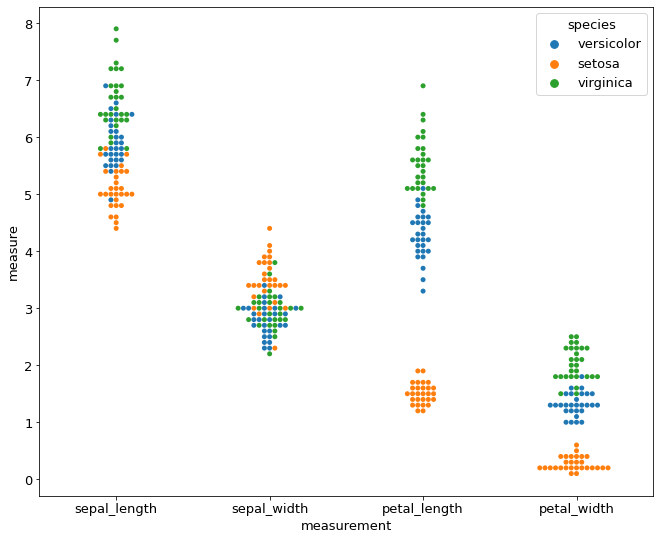

In [149]:
#stp 3: The x-axis should be the variable name, the y-axis the measure. 
#Add another dimension using color to represent species. 

sns.swarmplot(data=train_melt, 
              x='measurement', 
              y='measure', 
              hue='species')
plt.show()

In [78]:
#stp 4: Document takeaways
### Takeaways

#Petal length and petal width are more accurate for determining species than sepal length and sepal width.
#Similar sepal widths
#maybe petal area and sepal area could be useful
#virginica iris have the largest petals
#setosa iris have the smallest petals
#setosa seem to have wide & short sepals

In [176]:
#Create 4 subplots (2 rows x 2 columns) of scatterplots.

#first, add sepal_area and petal_area to set up for subplots
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


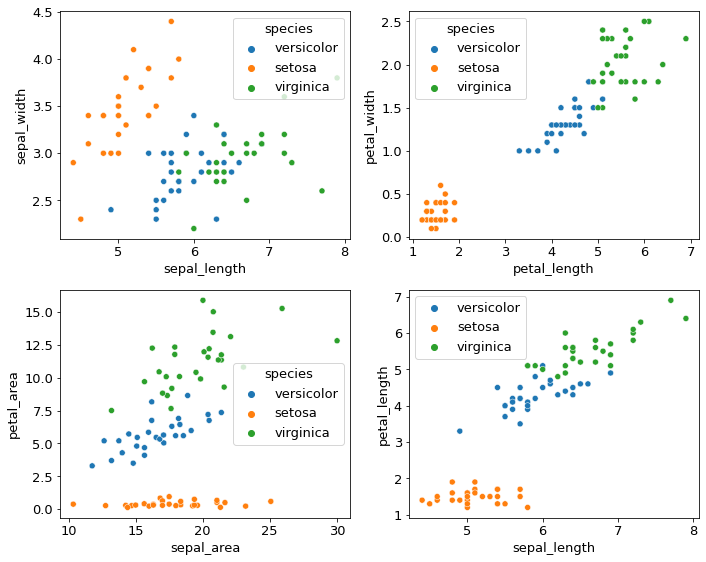

In [177]:
#next, plot the subplots

plt.figure(figsize=(10,8))

#sepal_length x sepal_width
plt.subplot(221)  #2 rows, 2 cols, 1st subplot
sns.scatterplot(x=train.sepal_length,y=train.sepal_width,hue=train.species)


#petal_length x petal_width
plt.subplot(222)  #2 rows, 2 cols, 2nd subplot
sns.scatterplot(x=train.petal_length,y=train.petal_width,hue=train.species)


#sepal_area x petal_area
plt.subplot(223)  #2 rows, 2 cols, 3rd subplot
sns.scatterplot(x=train.sepal_area,y=train.petal_area,hue=train.species)


#sepal_length x petal_length
plt.subplot(224)  #2 rows, 2 cols, 4th subplot
sns.scatterplot(x=train.sepal_length,y=train.petal_length,hue=train.species)

plt.legend()
plt.tight_layout()


#### What are your takeaways?

- setosa is more distinct than the other two flower species
- petal length vs width has the biggest disctinction for setosa
- sepal length is useful, there is division
- sepal width not great but likely adds some value (some division but not much)
- petal area is very useful (clear divisions)
- sepal area (not as much clear division)
- sepal_area-don't see much separation when we look at the 3rd plot in a hortizonal direction. 
- Again, some value in sepal width, but not a ton.

In [150]:
#alternate to creating subplots
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):#loop through each subset and plot it
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()


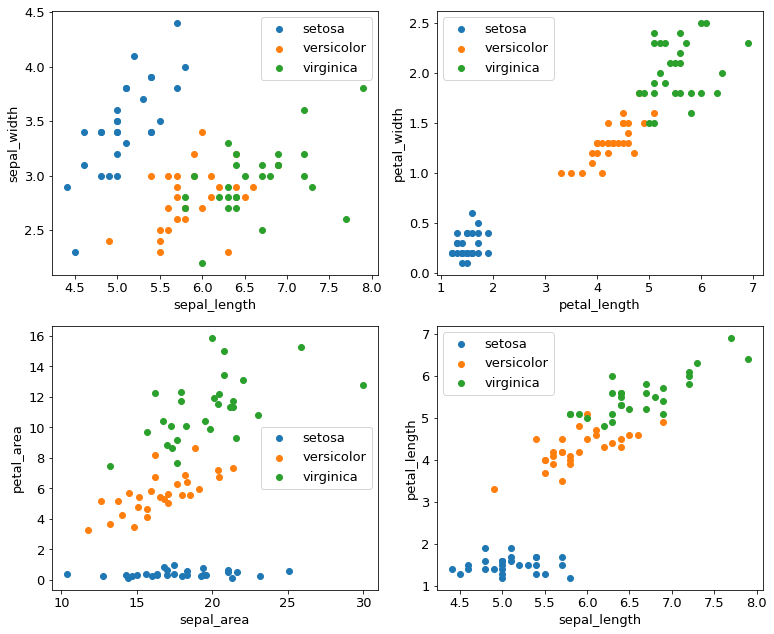

In [153]:
#subplots:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()


In [88]:
#Create a heatmap of each variable layering correlation coefficient on top.

corr = train.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


<AxesSubplot:>

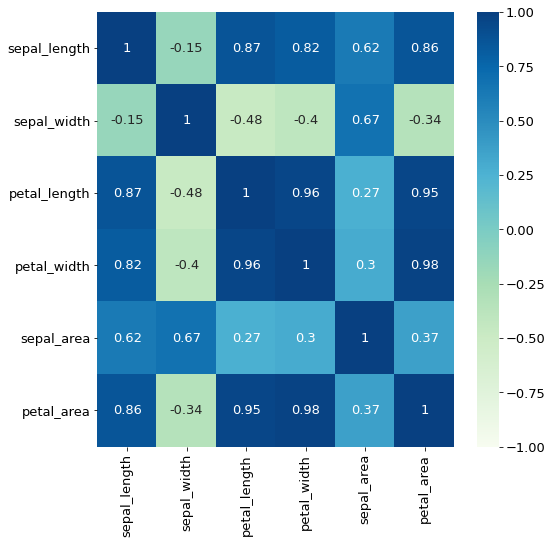

In [103]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, #set min value for  color scale at -1.
            cmap='GnBu', #change default color 
#website for diff colors: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
            annot=True) #add annotations for each of the correlations



**Note** Do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.

#### Takeaways

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width.

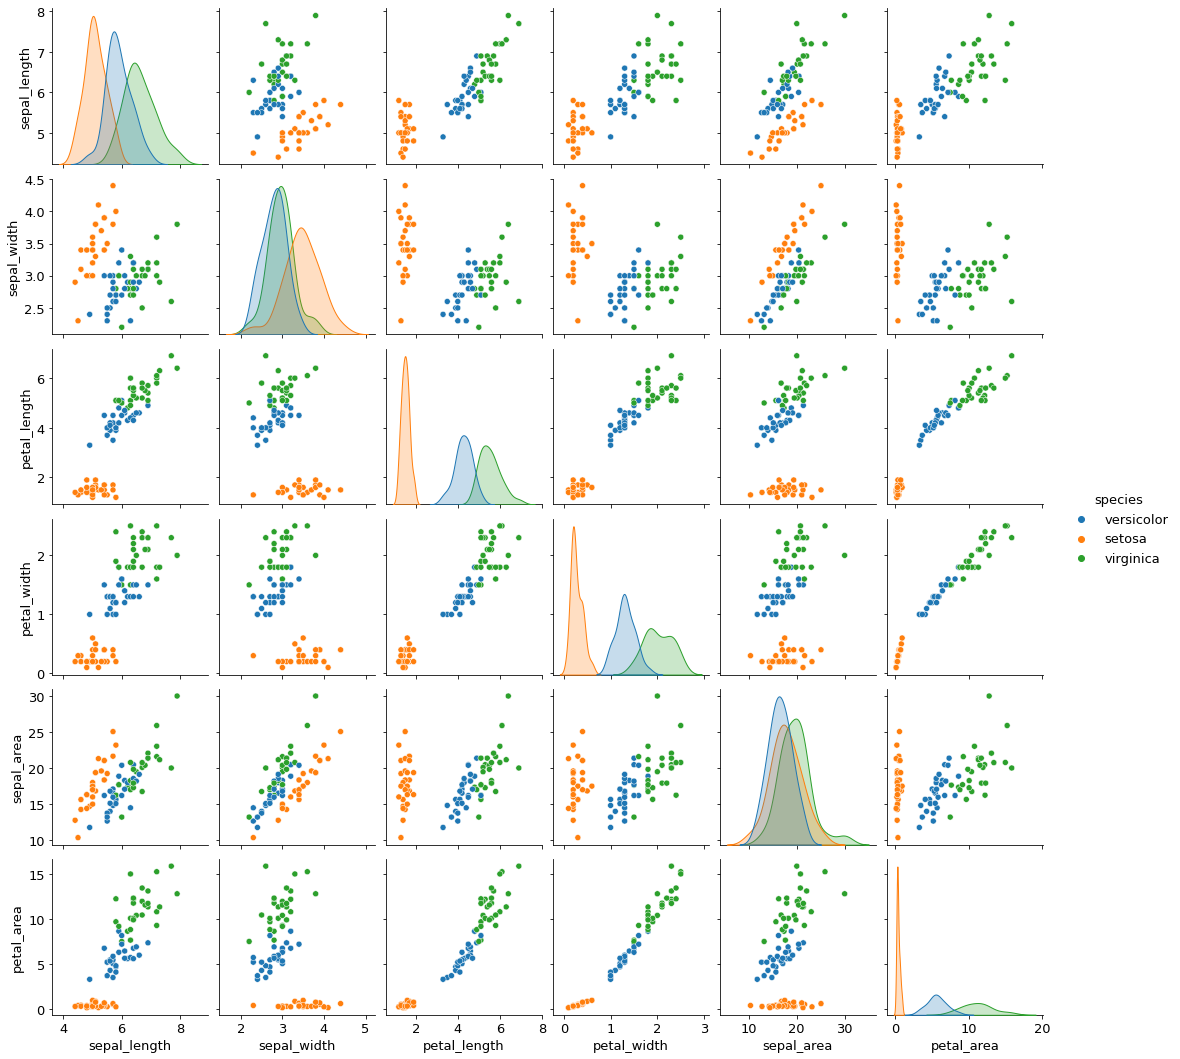

In [157]:
#Create a scatter matrix visualizing the interaction of each variable.

sns.pairplot(train, hue="species")


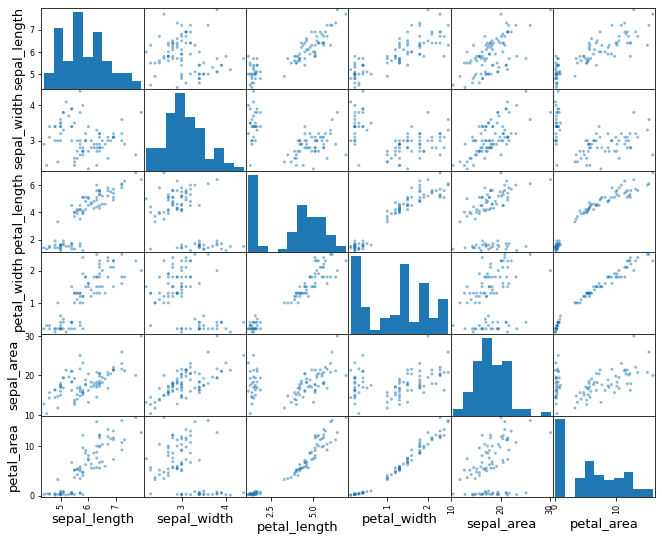

In [156]:
#alternate pandas way:
pd.plotting.scatter_matrix(train)
plt.show()

#### Takeaways

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine.
- petal area seems to show the largest separation between virginica & versicolor of all the individual features.
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
- virginica and versicolor show little to no difference when it comes to the width of the sepals.

In [117]:
#Is the sepal length significantly different in virginica compared to versicolor? 
#Run a statistical experiment to test this. (2-sample, 2-tailed)

#Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
null_hypothesis = "there is no difference in sepal length between virginica and versicolor"
alternative_hypothesis = "sepal length is significantly different in virginica compared to versicolor"
alpha = .05

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']


In [119]:
versicolor_sepal = versicolor.sepal_length
virginica_sepal = virginica.sepal_length

In [109]:
from scipy import stats

In [121]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(virginica_sepal, versicolor_sepal)

t, p

(5.656491804882077, 6.024259917536193e-07)

In [123]:
#What is your takeaway from this statistical testing?

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that there is no difference in sepal length between virginica and versicolor
We accept that sepal length is significantly different in virginica compared to versicolor


In [ ]:
#above takeaway means it is useful to use sepal length
#sepal length would be a good feature

#another way to look at test below:

#### Test

- We want to compare mean sepal length of the 2 different species. Therefore, a t-test or Mann-Whitney test will be useful. Mann-Whitney is the non-parametric version of the t-test. That means that if your data does not meet the necessary assumptions for a t-test, you can use the Mann-Whitney test. You can use it exactly the same as you would the t-test. It is just a different method to call from scipy.stats.

#### Assumptions

- Assumptions are met and we will use an independent t-test.

- Looking at the histograms, distribution appears normal.
- Looking at the histograms, variance appears mostly equal.
- We know that versicolor flowers and virginica flowers are independent and separate species.

#### Hypothesis

alpha = .05

$H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.

$H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$.

In [158]:
import scipy.stats as stats

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [159]:
# looks normal on histogram, and mean and median are very close. 
# We can assume normality with minimal risk. 

train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [160]:
# variances are close. 
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.283425925925926, 0.18109788359788362)

In [179]:
#check the t-statistic and p-value and check yourself if p is < alpha
stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length)

Ttest_indResult(statistic=5.656491804882077, pvalue=6.024259917536193e-07)

In [181]:
#or do below:
t, p = stats.ttest_ind(virginica_sepal, versicolor_sepal)

t, p

(5.656491804882077, 6.024259917536193e-07)

In [182]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that there is no difference in sepal length between virginica and versicolor
We accept that sepal length is significantly different in virginica compared to versicolor


#### Conclusion

We reject $H_0$ that the sepal length is the same for both groups.
Takeaway

Sepal length will be a useful feature.

In [125]:
#Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

#Pearson's R correlation test
virginica = train[train.species == 'virginica'].sepal_length
versicolor = train[train.species == 'versicolor'].sepal_length

In [127]:
r, p = stats.pearsonr(virginica, versicolor)
r, p

(0.1295564478755326, 0.5111354634944449)

In [135]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")
    print("No linear relationship in sepal length between versicolor and virginica.")

We failed to reject the hypothesis
No linear relationship in sepal length between versicolor and virginica.


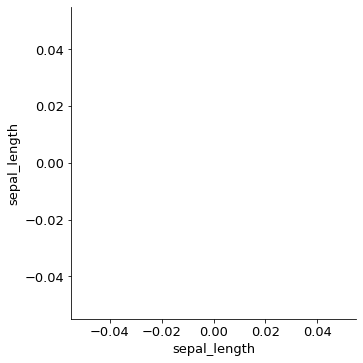

In [136]:
sns.relplot(x=virginica,y=versicolor)

#### What about sepal_width? Let's use the Mann-Whitney test for demo purposes.

#### Hypothesis

alpha = .05

$H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.

$H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$.

In [163]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width)

MannwhitneyuResult(statistic=274.0, pvalue=0.026286295699228482)

#### Conclusion

We reject $H_0$ that the sepal width is the same!

#### Takeaway

Sepal width, while not the strongest indicator, is still useful.

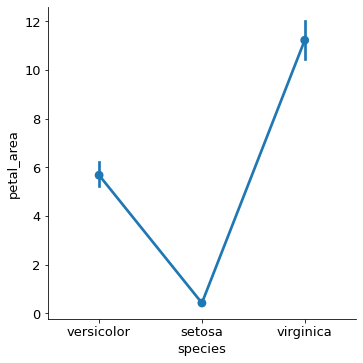

In [164]:
#using catplot
sns.catplot(data=train, x='species', y='petal_area', kind='point')

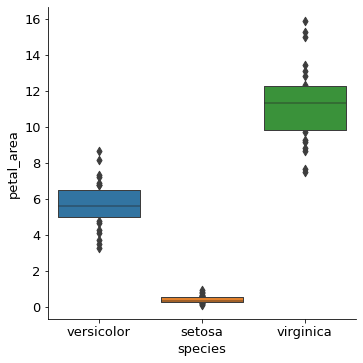

In [165]:
sns.catplot(data=train, x='species', y='petal_area', kind='boxen')

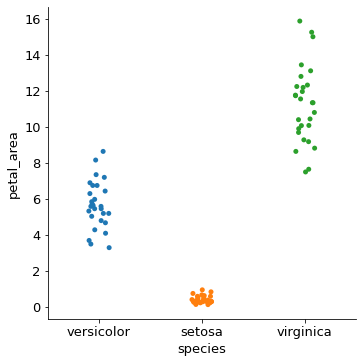

In [166]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

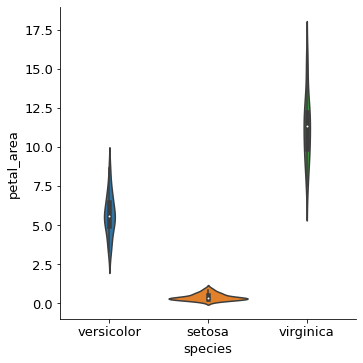

In [167]:
sns.catplot(data=train, x='species', y='petal_area', kind='violin')

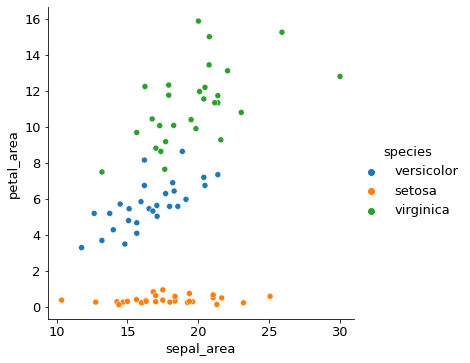

In [168]:
#using relplot
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species')


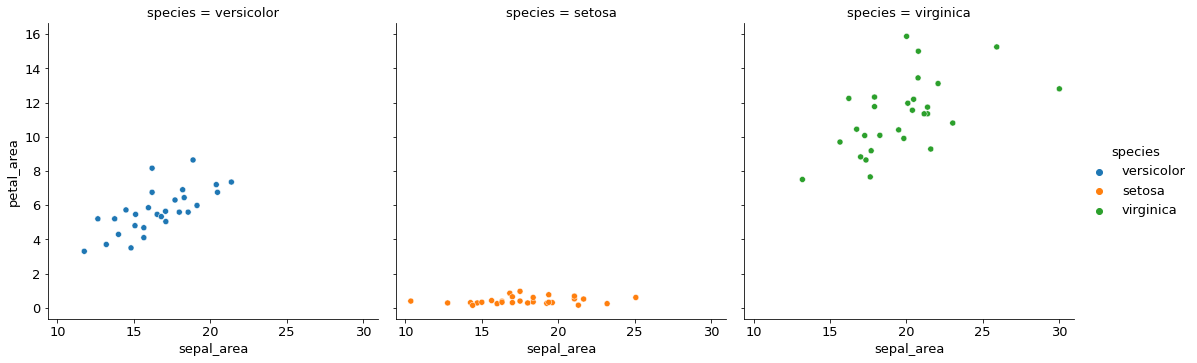

In [169]:
#separate variables w/ relplot
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')